<a href="https://colab.research.google.com/github/NicoloAvesani/Mining_Project/blob/main/MINING_PROJECT_WITH_EXPERIMENTS_ON_PARAMETERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENTS TO DO:
- MEMORY REQUIREMENT OF ALGORITHMS
- CHANGING THE VALUE OF FREQUENT AND TOTAL INITIAL ITEMS
- POI GLI CHIEDIAMO SE PUO DARCI IL VOTO E BASTA


#EXPERIMENT WITH RAWS EQUAL TO 1 MILLION TRANSACTIONS, 100 FREQUENT ITEMS AND 5000 AS CARDINALITY OF THE UNIVERSE OF ITEMS

#Dataset generator
https://github.com/jeffheaton/papers/blob/master/2016/ieee-freq-item/GenerateFreqData.py


In [ ]:
# This Python script was used to collect the data for following paper/conference:
#
# Heaton, J. (2016, April). Comparing Dataset Characteristics that Favor the Apriori,
# Eclat or FP-Growth Frequent Itemset Mining Algorithms. In SoutheastCon 2015 (pp. 1-6). IEEE.
#
# http://www.jeffheaton.com
#

# Generate benchmark data for frequent itemset mining.
__author__ = 'jheaton'
import random
import csv
from tqdm import tqdm

def sizeof_fmt(num):
    for x in ['','k','m','g']:
        if num < 1000.0:
            return "%3.1f%s" % (num, x)
        num /= 1000.0
    return "%3.1f%s" % (num, 't')

def generate_itemset(row_count, max_per_basket, num_freq_sets, item_count, prob_frequent):
    '''
    Generate a dataset of frequent items. These paramaters can be changed to
    determine the type of data to generate.

    :param int row_count: The number of rows in the dataset.
    :param int max_per_basket: Maximum number of items per basket.
    :param int num_freq_sets: The number of unique frequent item sets.
    :param int item_count: The number of unique items.
    :param float prob_frequent: The probability of a basket containing a frequent itemset.
    '''
    # Generate the data
    pop_frequent = ["F"+str(n) for n in range(0,max_per_basket)]
    pop_regular = ["I"+str(n) for n in range(max_per_basket,item_count)]
    freq_itemsets = []

    # Create a filename that encodes the max_per_basket and basket_count into
    # the filename.
    filename = str(prob_frequent)+"_tsz" \
        + str(max_per_basket)+'_tct' \
         +sizeof_fmt(row_count)+'.txt'

    for i in tqdm(range(num_freq_sets),desc=f"{filename}:pass 1/2"):
        cnt = random.randint(1,max_per_basket)
        freq_itemsets.append(random.sample(pop_frequent,cnt))

    with open(filename, 'w') as f:
        for i in tqdm(range(row_count),desc=f"{filename}:pass 2/2"):
            line = []

            cnt = random.randint(1,max_per_basket)
            if random.random()<=prob_frequent:
                idx = random.randint(0,len(freq_itemsets)-1)
                for j in range(len(freq_itemsets[idx])):
                    line.append(freq_itemsets[idx][j])

            needed = max(0,cnt - len(line))
            line = line + random.sample(pop_regular,needed)

            f.write(" ".join(line)+"\n")

random.seed(1000)
ROWS = 1000000

for i in range(10,100,10):
    generate_itemset(ROWS, i, 100, 5000, 0.5)

for i in range(1,9,1):
    generate_itemset(ROWS, 50, 100, 5000, i/10.0)

0.8_tsz50_tct1.0m.txt:pass 2/2: 100%|██████████| 1000000/1000000 [00:15<00:00, 63687.38it/s]


In [ ]:
    #Generate a dataset of frequent items. These paramaters can be changed to
    #determine the type of data to generate.

    #:param int row_count: The number of rows in the dataset. (in this case they are 10000)
    #:param int max_per_basket: Maximum number of items per basket. (max 100 items per basket)
    #:param int num_freq_sets: The number of unique frequent item sets. (100 freq item sets)
    #:param int item_count: The number of unique items. (500 unique items)
    #:param float prob_frequent: The probability of a basket containing a frequent itemset. (50% is the probability that a basket contains a freq itemset)

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('0.5_tsz20_tct1.0k.txt')

In [ ]:
# I want the dataset to be a np.array
dataset_array = np.array(dataset)

In [ ]:
dataset_array[:16]

array([['I710 I72 I236 I2442 I4449 I3919 I4518 I230 I2757 I112 I1621 I1514'],
       ['F19 F11 F1 F5 I4690 I1152 I1940 I977 I4234 I1946 I1882 I2209 I31 I1467 I184 I2865 I3708 I2532 I546 I1249'],
       ['I358 I3583 I907 I3649 I3159 I4632 I56 I788 I1091 I2426'],
       ['I3703 I4656 I3244 I3275 I65 I4891 I4707 I4206 I3290'],
       ['I3525 I625 I2473 I3172 I4211 I2565 I2302 I2626'],
       ['I4924 I3739 I2205 I3663 I1360 I1528 I4603 I2148 I2709 I2062 I2833 I4617 I3137 I3102 I3803 I1241'],
       ['F10 F1 F18 F14 F5'],
       ['F9 F3 F14 F12 F5 F8 I4625 I4147 I1733 I3392 I1115 I2641 I3240 I3625 I177 I4442 I3360 I511 I198 I2225'],
       ['I2568 I3688 I3436 I3535'],
       ['I2492 I3113 I4469 I1368 I3888 I2643 I1842 I362 I3923 I1766'],
       ['I1191 I2588 I1947 I2154 I3102 I1106 I4716 I3631 I4936 I2632 I3794 I1747 I3227 I188 I2183 I2381 I1468 I4120 I1052'],
       ['I1752 I3824'],
       ['F5 F4 F2 F18 F6 F15 F12 F8 F17 F7 F10 F16 F14 F13 F3 F11 F19 F0 F1'],
       ['F0 F10 F11 F13 F7 F1

In [ ]:
print(dataset_array[3])

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
new_array = []
for i in range(len(dataset_array)):
    split_elements = np.char.split(dataset_array[i].astype(str))
    ok_split_elements = (split_elements[0])
    new_array.append(ok_split_elements)

['F13 I4669 I2119 I1707 I3740 I782 I2177 I1007 I4876 I1004 I1347 I2098 I3800 I4412']


In [ ]:
#now it works
new_array[3]

['F13',
 'I4669',
 'I2119',
 'I1707',
 'I3740',
 'I782',
 'I2177',
 'I1007',
 'I4876',
 'I1004',
 'I1347',
 'I2098',
 'I3800',
 'I4412']

In [ ]:
for i in range(21):
  print('lenght new_array',i,'=',len(new_array[i]))

lenght new_array 0 = 12
lenght new_array 1 = 1
lenght new_array 2 = 14
lenght new_array 3 = 14
lenght new_array 4 = 6
lenght new_array 5 = 18
lenght new_array 6 = 11
lenght new_array 7 = 5
lenght new_array 8 = 15
lenght new_array 9 = 16
lenght new_array 10 = 7
lenght new_array 11 = 4
lenght new_array 12 = 1
lenght new_array 13 = 14
lenght new_array 14 = 9
lenght new_array 15 = 14
lenght new_array 16 = 13
lenght new_array 17 = 18
lenght new_array 18 = 4
lenght new_array 19 = 17
lenght new_array 20 = 4


In [ ]:
size_dataset = [
    '0.5_tsz10_tct1.0m.txt',
    '0.5_tsz20_tct1.0m.txt',
    '0.5_tsz30_tct1.0m.txt',
    '0.5_tsz40_tct1.0m.txt',
    '0.5_tsz50_tct1.0m.txt',
    '0.5_tsz60_tct1.0m.txt',
    '0.5_tsz70_tct1.0m.txt',
    '0.5_tsz80_tct1.0m.txt',
    '0.5_tsz90_tct1.0m.txt',
]

In [ ]:
density_dataset =[
    '0.1_tsz50_tct1.0m.txt',
    '0.2_tsz50_tct1.0m.txt',
    '0.3_tsz50_tct1.0m.txt',
    '0.4_tsz50_tct1.0m.txt',
    '0.5_tsz50_tct1.0m.txt',
    '0.6_tsz50_tct1.0m.txt',
    '0.7_tsz50_tct1.0m.txt',

]

# APRIORI

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from apyori import apriori
import time

# Example dataset
dataset = new_array

# Minimum support threshold
min_support = 0.15

start = time.time()
# Apply the Apriori algorithm
results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
for itemset in results:
    items = list(itemset.items)
    support = itemset.support
    print(items, support)

end = time.time()

print('Time required:', end - start)


# APRIORI DENSITY

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from apyori import apriori
import pandas as pd
import time
import numpy as np

In [ ]:
#apriori density

runtime_apriori_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]

for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  min_support = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array



  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori_density.append(result_time)

In [ ]:
runtime_apriori_density

[26.506985902786255,
 41.85250520706177,
 39.62910079956055,
 39.84100008010864,
 51.224172592163086,
 50.02581214904785,
 230.3804214000702]

In [ ]:
import matplotlib.pyplot as plt

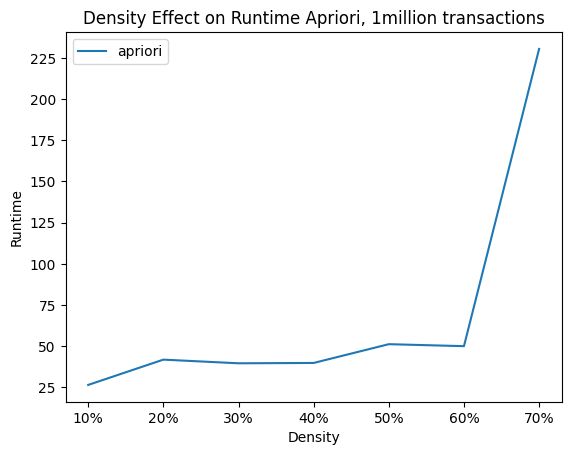

In [ ]:
#plt apriori density
plt.title('Density Effect on Runtime Apriori, 1million transactions')
plt.plot(runtime_apriori_density, label='apriori')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# APRIORI SIZE

In [ ]:
#apriori size
runtime_apriori = []


for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)


# Example dataset
  dataset = new_array

# Minimum support
  min_support=0.2

  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support


  end = time.time()

  result_time = end - start

  runtime_apriori.append(result_time)


In [ ]:
runtime_apriori

[7.136429786682129,
 14.622708082199097,
 30.0984098093805,
 35.994372844696045,
 55.7227246761322,
 73.37462401390076,
 82.36878180503845,
 117.68601083755493,
 147.40328001976013]

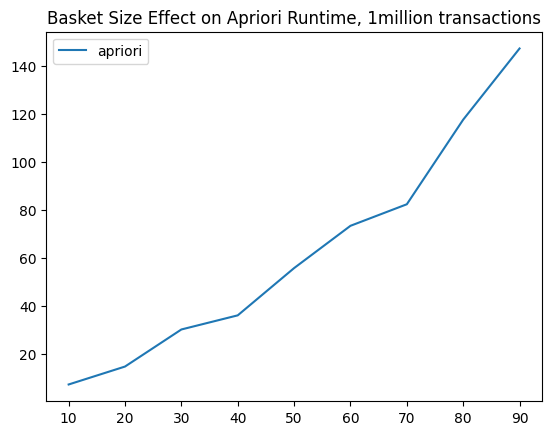

In [ ]:
#plt apriori size
plt.title('Basket Size Effect on Apriori Runtime, 1million transactions')
plt.plot(runtime_apriori, label='apriori')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# FP-GROWTH ALGORITHM

#fp-growth
https://github.com/JackHCC/Apriori-and-FP_Growth/blob/master/FP_growth.py


In [ ]:
#fp-growth

# fp-growth

from collections import defaultdict, namedtuple
import time

def find_frequent_itemsets(transactions, minimum_support, include_support=False):
    # Function to find frequent itemsets in the transactions dataset

    items = defaultdict(lambda: 0)

    for transaction in transactions:
        for item in transaction:
            items[item] += 1

    # Filtering frequent 1-itemsets
    items = dict((item, support) for item, support in items.items()
        if support >= minimum_support)

    def clean_transaction(transaction):
        transaction = filter(lambda v: v in items, transaction)
        transaction_list = list(transaction)
        transaction_list.sort(key=lambda v: items[v], reverse=True)
        return transaction_list

    # Constructing the FP-tree
    master = FPTree()
    for transaction in map(clean_transaction, transactions):
        master.add(transaction)

    def find_with_suffix(tree, suffix):
        for item, nodes in tree.items():
            support = sum(n.count for n in nodes)
            if support >= minimum_support and item not in suffix:
                found_set = [item] + suffix
                yield (found_set, support) if include_support else found_set

                cond_tree = conditional_tree_from_paths(tree.prefix_paths(item))
                for s in find_with_suffix(cond_tree, found_set):
                    yield s

    for itemset in find_with_suffix(master, []):
        yield itemset

class FPTree(object):
    # FP-tree data structure

    Route = namedtuple('Route', 'head tail')

    def __init__(self):
        # Initialize the root node and routes
        self._root = FPNode(self, None, None)
        self._routes = {}

    @property
    def root(self):
        # Create the root node
        return self._root

    def add(self, transaction):
        # Add a transaction to the tree
        point = self._root

        for item in transaction:
            next_point = point.search(item)
            if next_point:
                # Current node already exists
                next_point.increment()
            else:
                # Create a new node
                next_point = FPNode(self, item)
                point.add(next_point)

                # Update the routes
                self._update_route(next_point)

            point = next_point

    def _update_route(self, point):
        assert self is point.tree

        try:
            route = self._routes[point.item]
            route[1].neighbor = point  # route[1] is the tail
            self._routes[point.item] = self.Route(route[0], point)
        except KeyError:
            # Start a new node
            self._routes[point.item] = self.Route(point, point)

    def items(self):
        # Iterate over the items in the tree
        for item in self._routes.keys():
            yield (item, self.nodes(item))

    def nodes(self, item):
        # Iterate over the nodes associated with an item
        try:
            node = self._routes[item][0]
        except KeyError:
            return

        while node:
            yield node
            node = node.neighbor

    def prefix_paths(self, item):
        # Generate prefix paths for an item
        def collect_path(node):
            path = []
            while node and not node.root:
                path.append(node)
                node = node.parent
            path.reverse()
            return path

        return (collect_path(node) for node in self.nodes(item))

    def inspect(self):
        # Print the tree structure
        self.root.inspect(1)

        for item, nodes in self.items():
            for node in nodes:
                print('    %r' % node)

def conditional_tree_from_paths(paths):
    # Construct a conditional tree from paths
    tree = FPTree()
    condition_item = None
    items = set()

    for path in paths:
        if condition_item is None:
            condition_item = path[-1].item

        point = tree.root
        for node in path:
            next_point = point.search(node.item)
            if not next_point:
                # Add a new node to the tree
                items.add(node.item)
                count = node.count if node.item == condition_item else 0
                next_point = FPNode(tree, node.item, count)
                point.add(next_point)
                tree._update_route(next_point)
            point = next_point

    assert condition_item is not None

    # Calculate the counts for nodes
    for path in tree.prefix_paths(condition_item):
        count = path[-1].count
        for node in reversed(path[:-1]):
            node._count += count

    return tree

class FPNode(object):
    # FP-tree node

    def __init__(self, tree, item, count=1):
        self._tree = tree
        self._item = item
        self._count = count
        self._parent = None
        self._children = {}
        self._neighbor = None

    def add(self, child):
        # Add a child node

        if not isinstance(child, FPNode):
            raise TypeError("Can only add other FPNodes as children")

        if not child.item in self._children:
            self._children[child.item] = child
            child.parent = self

    def search(self, item):
        # Search for a child node with the given item
        try:
            return self._children[item]
        except KeyError:
            return None

    def __contains__(self, item):
        return item in self._children

    @property
    def tree(self):
        return self._tree

    @property
    def item(self):
        return self._item

    @property
    def count(self):
        return self._count

    def increment(self):
        if self._count is None:
            raise ValueError("Root nodes have no associated count.")
        self._count += 1

    @property
    def root(self):
        return self._item is None and self._count is None

    @property
    def leaf(self):
        return len(self._children) == 0

    @property
    def parent(self):
        return self._parent

    @parent.setter
    def parent(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a parent.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a parent from another tree.")
        self._parent = value

    @property
    def neighbor(self):
        return self._neighbor

    @neighbor.setter
    def neighbor(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a neighbor.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a neighbor from another tree.")
        self._neighbor = value

    @property
    def children(self):
        return tuple(self._children.values())

    def inspect(self, depth=0):
        for child in self.children:
            child.inspect(depth + 1)

    def __repr__(self):
        if self.root:
            return "<%s (root)>" % type(self).__name__
        return "<%s %r (%r)>" % (type(self).__name__, self.item, self.count)


In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    start = time.time()

    total_baskets = len(dataset)
    min_support = 0.15 * total_baskets

    frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

    result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))

    result = sorted(result, key=lambda i: i[0])
    for itemset, support in result:
        print(str(itemset) + ' ' + str(support/total_baskets))

    end = time.time()
    print('Execution time:', str(end - start))

# FP-GROWTH DENSITY

In [ ]:
#fp-growth density
runtime_fpgrowth_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  total_baskets = len(dataset)
  min_support = min_supporto[i] * total_baskets

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()




      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth_density.append(result_time)



In [ ]:
runtime_fpgrowth_density

[10.776489496231079,
 15.495903491973877,
 14.574411153793335,
 16.91091775894165,
 18.709099531173706,
 18.81884527206421,
 24.901336193084717]

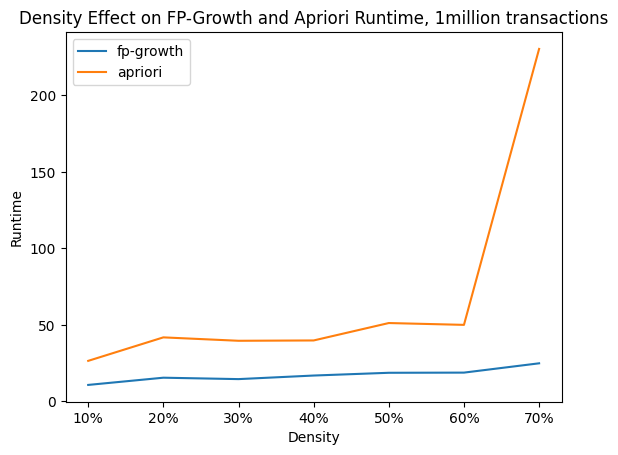

In [ ]:
#plt fp-growh and apriori density
plt.title('Density Effect on FP-Growth and Apriori Runtime, 1million transactions')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.plot(runtime_apriori_density, label='apriori')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

# FP-GROWTH SIZE

In [ ]:
#fp-growth size
runtime_fpgrowth = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()

      result_time = end - start
      runtime_fpgrowth.append(result_time)

In [ ]:
runtime_fpgrowth

[4.228600263595581,
 8.839377164840698,
 12.316473960876465,
 14.976262092590332,
 19.05162239074707,
 24.243645191192627,
 29.316738605499268,
 33.5407977104187,
 41.497377157211304]

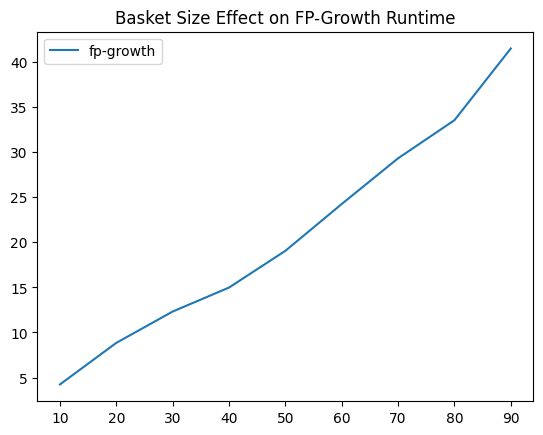

In [ ]:
#plt fp-growth and apriori size
plt.title('Basket Size Effect on FP-Growth Runtime')
plt.plot(runtime_fpgrowth, label='fp-growth')
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.legend()
plt.show()

# FP-TREE

In [ ]:
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from anytree import Node, RenderTree

# Define the itemsets and their support values
itemsets = result

# Create the root node
root = Node("Root")

# Create the tree nodes and add them to the tree
for itemset, support in itemsets:
    current_node = root
    for item in itemset:
        child_node = None
        for child in current_node.children:
            if child.name == item:
                child_node = child
                break
        if child_node is None:
            child_node = Node(item, parent=current_node)
        current_node = child_node

# Print the tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


Root
├── F0
├── F1
│   ├── F0
│   └── F76
├── F10
├── F11
├── F12
│   └── F24
├── F13
├── F14
├── F15
├── F16
├── F17
├── F18
│   ├── F0
│   ├── F1
│   ├── F10
│   ├── F12
│   ├── F24
│   ├── F27
│   ├── F3
│   ├── F33
│   ├── F34
│   ├── F56
│   ├── F59
│   ├── F62
│   ├── F65
│   └── F71
├── F19
├── F2
│   ├── F0
│   ├── F1
│   ├── F18
│   ├── F20
│   ├── F22
│   ├── F24
│   ├── F25
│   ├── F3
│   ├── F34
│   ├── F35
│   ├── F47
│   ├── F63
│   └── F78
├── F20
│   ├── F24
│   └── F3
├── F21
├── F22
│   ├── F1
│   ├── F12
│   ├── F18
│   ├── F33
│   ├── F44
│   ├── F48
│   ├── F62
│   ├── F65
│   ├── F76
│   └── F84
├── F23
├── F24
├── F25
│   └── F33
├── F26
├── F27
├── F28
├── F29
├── F3
│   ├── F25
│   └── F63
├── F31
├── F32
├── F33
├── F34
│   └── F0
├── F35
├── F36
├── F37
├── F38
│   ├── F10
│   ├── F12
│   ├── F16
│   ├── F18
│   ├── F2
│   ├── F22
│   ├── F24
│   ├── F44
│   ├── F47
│   ├── F58
│   ├── F68
│   ├── F72
│   ├── F78
│   └── F86
├── F39
├── F4
├── F40
├── F41
├──

# ECLAT ALGORITHM

# ECLAT
https://github.com/jagdeep227/Frequent_itemset_mining/blob/main/Eclat_g.py


In [ ]:
# eclat
#eclat
import time

FreqItems = dict()
support = dict()


def eclat(prefix, items, dict_id ,minsup,cnt):

    while items:
        i ,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup*cnt:
            print(prefix + [i], isupp/len(dataset))
            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                jtids = itids & ojtids
                if len(jtids ) >= minsup*cnt:
                    suffix.append((j, jtids))
            dict_id += 1
            eclat(prefix +[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id ,minsup,cnt)

In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets

    start = time.time()
    items = {}

    for transaction_id, transaction in enumerate(dataset):
        for item in transaction:
            if item in items:
                items[item].add(transaction_id)
            else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
    items = [(item, itids) for item, itids in items.items()]


    cnt = len(dataset)
    minsup = 0.15
    # Function call to start ECLAT algorithm
    eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

    '''result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))'''

    '''result'''

    end = time.time()
    print('Execution time:', str(end - start))

['F18'] 0.23723723723723725
['F18', 'F7'] 0.15215215215215216
['F18', 'F9'] 0.15315315315315314
['F18', 'F0'] 0.15815815815815815
['F18', 'F13'] 0.15815815815815815
['F18', 'F8'] 0.16016016016016016
['F18', 'F2'] 0.16116116116116116
['F18', 'F12'] 0.16416416416416416
['F18', 'F6'] 0.16616616616616617
['F18', 'F19'] 0.16616616616616617
['F18', 'F10'] 0.17017017017017017
['F18', 'F1'] 0.17917917917917917
['F18', 'F14'] 0.18218218218218218
['F11'] 0.23923923923923923
['F11', 'F17'] 0.15015015015015015
['F11', 'F6'] 0.15315315315315314
['F11', 'F2'] 0.15415415415415415
['F11', 'F12'] 0.16616616616616617
['F11', 'F12', 'F14'] 0.15415415415415415
['F11', 'F1'] 0.16616616616616617
['F11', 'F19'] 0.17517517517517517
['F11', 'F19', 'F14'] 0.15015015015015015
['F11', 'F19', 'F4'] 0.15315315315315314
['F11', 'F4'] 0.17617617617617617
['F11', 'F16'] 0.17917917917917917
['F11', 'F16', 'F14'] 0.15615615615615616
['F11', 'F14'] 0.1991991991991992
['F10'] 0.24024024024024024
['F10', 'F5'] 0.1561561561

# ECLAT SIZE

In [ ]:
#eclat size

runtime_eclat = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)



# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}
      start = time.time()
    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]


      cnt = len(dataset)
      minsup = 0.2
    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat.append(result_time)



['F9'] 0.22512322512322513
['F8'] 0.26494926494926496
['F5'] 0.2749022749022749
['F5', 'F0'] 0.20013520013520014
['F5', 'F6'] 0.20027120027120027
['F5', 'F2'] 0.21012221012221013
['F5', 'F3'] 0.21018821018821018
['F7'] 0.2753082753082753
['F7', 'F3'] 0.2001082001082001
['F7', 'F6'] 0.21033321033321034
['F2'] 0.2899142899142899
['F2', 'F1'] 0.2050942050942051
['F2', 'F0'] 0.21010721010721012
['F2', 'F3'] 0.22006922006922006
['F0'] 0.2902082902082902
['F0', 'F1'] 0.2099062099062099
['F0', 'F3'] 0.2200932200932201
['F0', 'F6'] 0.2203122203122203
['F1'] 0.2952922952922953
['F1', 'F3'] 0.20022420022420023
['F1', 'F6'] 0.20542020542020542
['F4'] 0.3046413046413046
['F4', 'F3'] 0.20504220504220505
['F4', 'F6'] 0.20512120512120513
['F6'] 0.30585530585530585
['F6', 'F3'] 0.2254202254202254
['F3'] 0.31034331034331036
['F1'] 0.21998721998721998
['F17'] 0.22515122515122515
['F4'] 0.2298822298822299
['F13'] 0.2395922395922396
['F9'] 0.24446224446224446
['F7'] 0.24996824996824996
['F5'] 0.2549092549

In [ ]:
runtime_eclat

[0.1715686321258545,
 0.4465785026550293,
 1.249875874234,
 2.1685831546783447,
 2.766145944595337,
 3.587485987234,
 4.413609027862549,
 6.898440980938042,
 7.2646283749234]

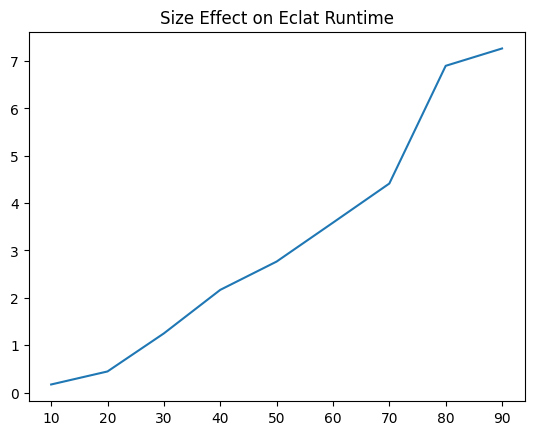

In [ ]:
plt.title('Size Effect on Eclat Runtime')
plt.plot(runtime_eclat,)
size = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(size)), size)
plt.show()

# ECLAT DENSITY

In [ ]:
#eclat density

runtime_eclat_density = []
min_supporto = [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
for i in range(len(density_dataset)):
  dataset = pd.read_csv(density_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)


  minsup = min_supporto[i]

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets


      items = {}

      for transaction_id, transaction in enumerate(dataset):
          for item in transaction:
              if item in items:
                items[item].add(transaction_id)
              else:
                items[item] = {transaction_id}

    # Convert the dictionary items into a list of tuples
      items = [(item, itids) for item, itids in items.items()]

      start = time.time()
      cnt = len(dataset)

    # Function call to start ECLAT algorithm
      eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

      end = time.time()
      result_time = end - start

      runtime_eclat_density.append(result_time)



['F1'] 0.040523040523040524
['F32'] 0.04227504227504227
['F44'] 0.042328042328042326
['F16'] 0.04335004335004335
['F8'] 0.04345804345804346
['F49'] 0.04418404418404418
['F28'] 0.0443990443990444
['F27'] 0.04453004453004453
['F4'] 0.04463704463704464
['F36'] 0.04531904531904532
['F6'] 0.04537704537704538
['F40'] 0.04628704628704629
['F13'] 0.046497046497046494
['F10'] 0.04653904653904654
['F35'] 0.04661004661004661
['F5'] 0.04738704738704739
['F21'] 0.04745604745604746
['F15'] 0.04756004756004756
['F42'] 0.04832904832904833
['F29'] 0.048343048343048346
['F9'] 0.04862104862104862
['F19'] 0.04934904934904935
['F33'] 0.049367049367049366
['F2'] 0.04939404939404939
['F2', 'F22'] 0.04139004139004139
['F47'] 0.04942204942204942
['F17'] 0.04945404945404945
['F45'] 0.04964204964204964
['F12'] 0.05023805023805024
['F0'] 0.05023905023905024
['F14'] 0.05049005049005049
['F39'] 0.050493050493050494
['F37'] 0.050504050504050504
['F20'] 0.050596050596050594
['F11'] 0.051164051164051164
['F23'] 0.0513

In [ ]:
runtime_eclat_density

[6.381849527359009,
 18.429470539093018,
 20.960642099380493,
 22.355714797973633,
 33.83668041229248,
 32.3863410949707,
 50.09840698039846]

# RESULTS

# DENSITY RESULTS WITH DIFFERENT TRANSACTIONS DATABASE LENGTH

# DENSITY EFFECT WITH 10K TRANSACTIONS

# DENSITY EFFECT WITH 100K TRANSACTIONS

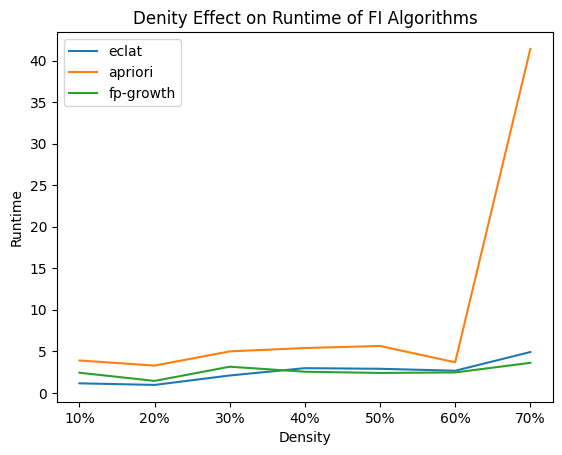

In [ ]:
#density with 100k transactions, 100 frequent items, 5000 as cardinality of universe of items

plt.title('Denity Effect on Runtime of FI Algorithms')
plt.plot(runtime_eclat_density, label='eclat')
plt.plot(runtime_apriori_density, label='apriori')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

**SOME CONSIDERATIONS**

We can see that both the **Eclat** and **FP-Growth** algorithms perform better than the **Apriori**.

**Apriori** Runtime goes to plus infitity when we have a density of 60%, that's because we reach the maximum memory that the RAM can handle, so the runtime increases a lot.

When the density is lower than 40%, **Eclat** is the faster algorithm, but for densities grater than 40% the **FP-Growth** becomes the best algorithm.

**BEST ALGORITHM**

if density < 40% : Eclat

else             : FP-Growth

# DENSITY EFFECT WITH 1MILLION TRANSACTIONS

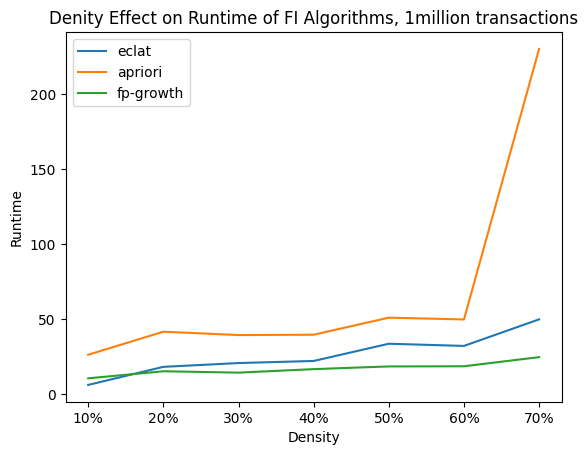

In [ ]:
#density with 1 million transactions
plt.title('Denity Effect on Runtime of FI Algorithms, 1million transactions')
plt.plot(runtime_eclat_density, label='eclat')
plt.plot(runtime_apriori_density, label='apriori')
plt.plot(runtime_fpgrowth_density, label='fp-growth')
plt.xlabel('Density')
plt.ylabel('Runtime')
density = ['10%','20%','30%','40%','50%','60%','70%']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()

**SOME CONSIDERATIONS**

Using a dataset with 1million transactions, we can see that there is actually an higher difference between Eclat and FP-Growth.

In this case, even if when we have a density of 10% the Eclat is the better algorithm, then by increasing the density of frequent itemsets, the FP-Growth is the faster and best algorithm.

Apriori remains the worst and slower algorithm, that's because, by increasing the number of transactions in the dataset, also the time required by the algorithm to read all them increases.

**BEST ALGORITHM**

FP-Growth

# SIZE EFFECT EXPERIMENT RESULTS WITH DIFFERENT TRASACTIONS LENGTH

# SIZE EFFECT WITH 100K TRANSACTIONS

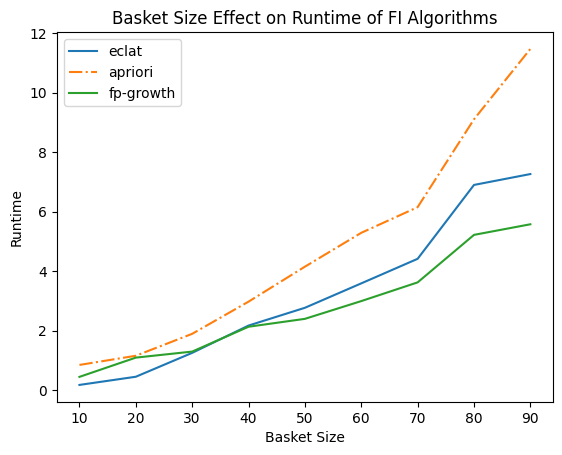

In [ ]:
# size
plt.title('Basket Size Effect on Runtime of FI Algorithms')
plt.plot(runtime_eclat, label='eclat')
plt.plot(runtime_apriori, label='apriori', linestyle='-.')
plt.plot(runtime_fpgrowth, label='fp-growth')
plt.xlabel('Basket Size')
plt.ylabel('Runtime')
density = ['10','20','30','40','50','60','70','80','90']
plt.xticks(range(len(density)), density)
plt.legend()
plt.show()


SOME CONSIDERATIONS

Overall, the three algorithms perform similarly, they grow in a linear way.

Also in this experiment the Apriori seems to be the slower algorithm, while Eclat and FP-Growth perform better.

When we have a low basket size, less than 40, the Eclat is the best algorithm, while when we increase the size of the buskets, the FP-Growth is the faster algorithm.

# SIZE EFFECT ON 1 MILLION TRANSACTIONS